In [1]:
import openpyxl
#number of stops
from datetime import datetime
import glob, os
os.chdir("C:\\Users\\Athul krishna\\myexcels\\production\\")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

# Collecting Data:
**Data** is imported from the excel from every *month*.
There are currently *Seven excels* given as **DataSet**:
  * product06.xlsx
  * product07.xml.xlsx
  * product08.xml.xlsx
  * product09.xml.xlsx
  * product10.xml.xlsx
  * product11.xml.xlsx
  * product12.xml.xlsx


In [3]:
from collections import defaultdict
w=defaultdict(list)
#for file in glob.glob("*.xlsx"):
    #print(file)

In [4]:
def check(d):
    if type(d) is datetime:
        month = d.strftime("%m")
        year=d.strftime("%Y")
        return month+year
    else:
        return d[5:7]+d[:4]
        

In [5]:
from collections import defaultdict
d=defaultdict(lambda:0)

In [6]:
def numberofstops(file,d):
    
    wb_obj = openpyxl.load_workbook(file) 
    sheet_obj = wb_obj.active
    c1=9
    #l=[]

    for i in range(2,sheet_obj.max_row+1):
        c=0
        for j in range(19,34,2):
            if float(sheet_obj.cell(row = i, column = j).value)>0:
                c+=1

        #month = now.strftime("%m")

        d[check(sheet_obj.cell(row = i, column = c1).value)]+=c
        #l.append(check(sheet_obj.cell(row = i, column = c1).value))
    
#print(l) 
#print(d)
    

In [7]:
for file in glob.glob("*.xlsx"):
    numberofstops(file,d)
#print(d)    

# Method:
In our dataset, we have duration specified in seconds. So the cells where the **stoppage duration** is equal to 0 is neglected and cells which contain values greater than 0 is considered for calculation of total number of stoppages.

In [8]:
#stoppage duration
m=[]
val=[]
for i in d.keys():
    m.append(i[:2])
    val.append(d[i])
print(m)
print(val)
q=[]
for i in m:
    q.append(int(i))
print(q)    

['06', '07', '08', '09', '10', '11', '12']
[8023, 4077, 3335, 3905, 3997, 4284, 4275]
[6, 7, 8, 9, 10, 11, 12]


In [9]:
df = pd.DataFrame(list(zip(m,val)), 
               columns =['Month', 'No.of Stoppages'])
x=df
x.head()


,Month,No.of Stoppages
0,06,8023
1,07,4077
2,08,3335
3,09,3905
4,10,3997


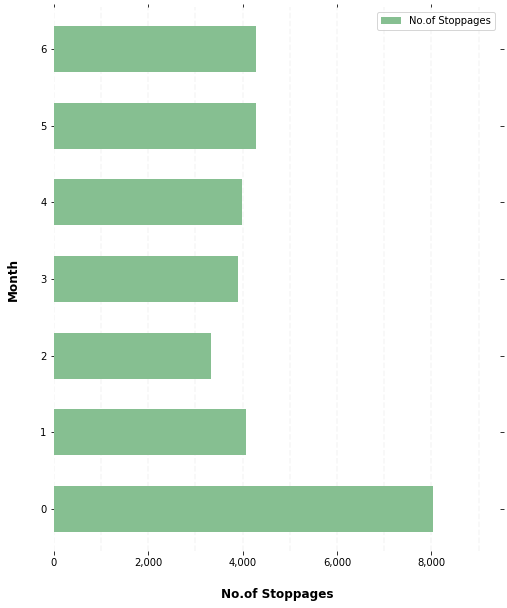

In [10]:
ax = x.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.60)

  # Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

  # Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

  # Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
      ax.axvline(x=tick, linestyle='dashed', alpha=0.5, color='#eeeeee', zorder=1)

  # Set x-axis label
ax.set_xlabel("No.of Stoppages", labelpad=20, weight='bold', size=12)

  # Set y-axis label
ax.set_ylabel("Month", labelpad=20, weight='bold', size=12)

  # Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

# Efficient Month:
The efficiency of **production** is calculated on the basis of **number of working hours** and the total time based on each month's *number of working days.*

In [11]:
def chec(d):
    if type(d) is datetime:
        month = d.strftime("%m")
        year=d.strftime("%Y")
        day=d.strftime("%d")
        return day+month+year
    else:
        return d[8:10]+d[5:7]+d[:4]

In [12]:
from collections import defaultdict
f=defaultdict(set)
def uniqdays(file,d):
    
    wb_obj = openpyxl.load_workbook(file) 
    sheet_obj = wb_obj.active
    c1=9
    #l=[]

    for i in range(2,sheet_obj.max_row+1):


        #month = now.strftime("%m")

        d[check(sheet_obj.cell(row = i, column = c1).value)].add(chec(sheet_obj.cell(row = i, column = c1).value))
        #l.append(check(sheet_obj.cell(row = i, column = c1).value))
    
#print(l) 
for file in glob.glob("*.xlsx"):
    uniqdays(file,f)
#print(d)  
dicts={}
for i in f.items():
    print(i)
    


('062020', {'30062020', '26062020', '25062020', '29062020', '20062020', '21062020', '24062020', '22062020', '28062020', '27062020', '23062020'})
('072020', {'06072020', '05072020', '04072020', '03072020', '02072020', '01072020'})
('082020', {'03082020', '29082020', '01082020', '25082020', '04082020', '27082020', '05082020', '02082020', '06082020'})
('092020', {'26092020', '01092020', '05092020', '11092020', '04092020', '03092020', '02092020'})
('102020', {'01102020', '02102020', '04102020', '05102020', '31102020', '03102020'})
('112020', {'30112020', '05112020', '02112020', '04112020', '01112020', '03112020'})
('122020', {'05122020', '02122020', '04122020', '01122020', '03122020'})
